# NorthWind Traders Data Analysis

In [13]:
from sqlalchemy import create_engine
import pandas as pd
import getpass
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sqlalchemy import create_engine
import getpass

# Database connection parameters
DATABASE = "north_wind_traders"  # Your database name
USER = "postgres"  # Change to your PostgreSQL username
HOST = "localhost"  # Change if using a remote server
PORT = "5432"  # Default PostgreSQL port

# Prompt for password securely
PASSWORD = getpass.getpass("Enter PostgreSQL password: ")

# Create connection string
conn_string = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create database engine
engine = create_engine(conn_string)

# Test connection
try:
    with engine.connect() as conn:
        print("Connected to PostgreSQL database successfully!")
except Exception as e:
    print(f"Error: {e}")

Connected to PostgreSQL database successfully!


In [9]:
# Example: Read data from the customers table
query = "SELECT * FROM customers;"
df = pd.read_sql(query, engine)

# Display the first 5 rows
df.head()

,customerid,companyname,contactname,contacttitle,city,country
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Mexico City,Mexico
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mexico City,Mexico
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,London,UK
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Luleå,Sweden


# Sales & Revenue Analysis

- Total revenue by month/year
- Top-selling products
- Best customers by total purchases
- Sales trends over time

## Total revenue by month/year

In [11]:
query = """
SELECT 
    EXTRACT(YEAR FROM o.orderDate) AS year,
    EXTRACT(MONTH FROM o.orderDate) AS month,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_revenue
FROM orders o
JOIN order_details od ON o.orderID = od.orderID
GROUP BY year, month
ORDER BY year, month;
"""
df_revenue = pd.read_sql(query, engine)
df_revenue.head()

,year,month,total_revenue
0,2013.0,7.0,27861.90
1,2013.0,8.0,25485.28
2,2013.0,9.0,26381.40
3,2013.0,10.0,37515.73
4,2013.0,11.0,45600.05


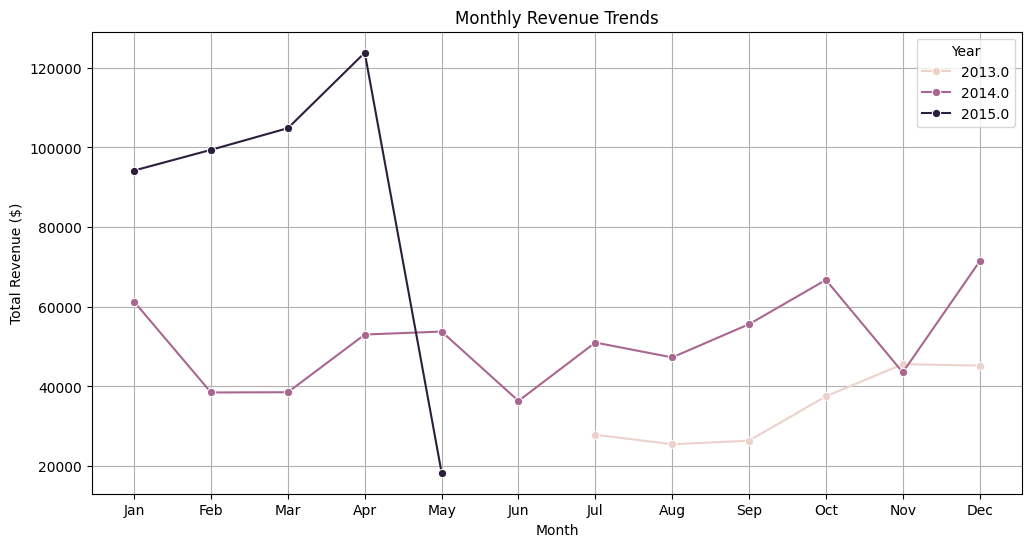

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_revenue, x="month", y="total_revenue", hue="year", marker="o")

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trends")
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend(title="Year")
plt.show()

## Top-selling products

In [40]:
query = """
SELECT 
    p.productID,
    p.productName,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_revenue
FROM order_details od
JOIN products p ON od.productID = p.productID
GROUP BY p.productID, p.productName
ORDER BY total_revenue DESC
LIMIT 10;
"""
df_top_products_revenue = pd.read_sql(query, engine)
df_top_products_revenue

,productid,productname,total_revenue
0,38,Côte de Blaye,141396.74
1,29,Thüringer Rostbratwurst,80368.67
2,59,Raclette Courdavault,71155.70
3,62,Tarte au sucre,47234.97
4,60,Camembert Pierrot,46825.48
5,56,Gnocchi di nonna Alice,42593.06
6,51,Manjimup Dried Apples,41819.65
7,17,Alice Mutton,32698.38
8,18,Carnarvon Tigers,29171.88
9,28,Rössle Sauerkraut,25696.64


C:\Users\User\AppData\Local\Temp\ipykernel_5800\2663280808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_products_revenue, x="total_revenue", y="productname", palette="viridis")


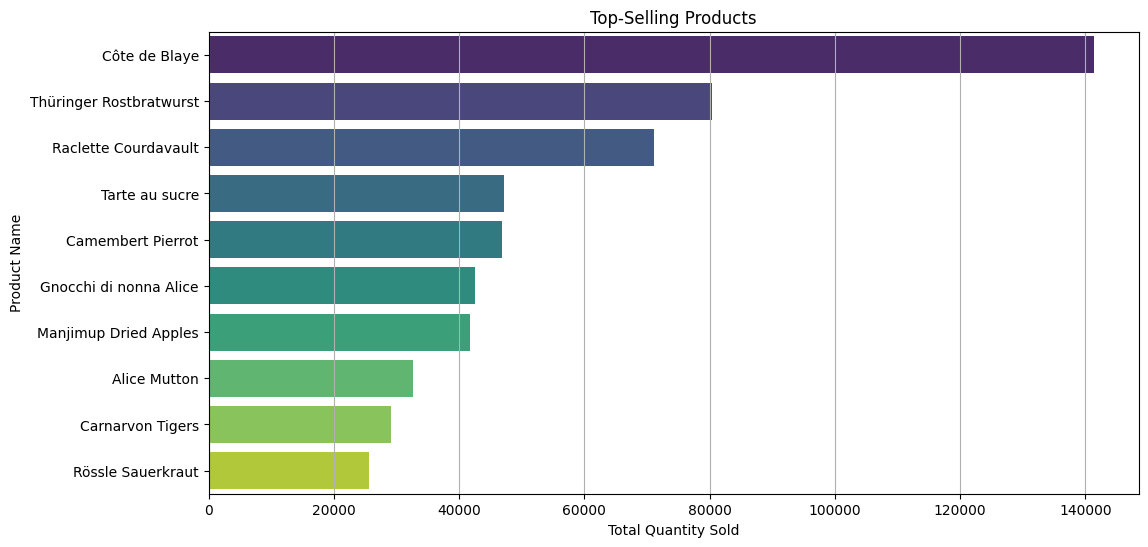

In [42]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_top_products_revenue, x="total_revenue", y="productname", palette="viridis")

plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top-Selling Products")
plt.grid(axis="x")
plt.show()

## Worst-selling products

In [38]:
query = """
SELECT 
    p.productID,
    p.productName,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_revenue
FROM order_details od
JOIN products p ON od.productID = p.productID
GROUP BY p.productID, p.productName
ORDER BY total_revenue ASC
LIMIT 10;
"""
df_worst_products_revenue = pd.read_sql(query, engine)
df_worst_products_revenue

,productid,productname,total_revenue
0,48,Chocolade,1368.71
1,33,Geitost,1648.13
2,15,Genen Shouyu,1784.83
3,67,Laughing Lumberjack Lager,2396.80
4,74,Longlife Tofu,2432.50
5,37,Gravad lax,2688.40
6,3,Aniseed Syrup,3044.00
7,52,Filo Mix,3232.95
8,66,Louisiana Hot Spiced Okra,3383.00
9,50,Valkoinen suklaa,3437.69


In [ ]:
# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_worst_products_revenue, x="total_revenue", y="productName", palette="Purples_r")
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.title("Worst-Selling Products (Least Revenue)")
plt.grid(axis="x")
plt.show()

## Best customers by total purchases

In [18]:
query = """
SELECT 
    c.customerID,
    c.companyName,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_spent
FROM orders o
JOIN order_details od ON o.orderID = od.orderID
JOIN customers c ON o.customerID = c.customerID
GROUP BY c.customerID, c.companyName
ORDER BY total_spent DESC
LIMIT 10;
"""
df_best_customers = pd.read_sql(query, engine)
df_best_customers

,customerid,companyname,total_spent
0,QUICK,QUICK-Stop,110277.31
1,ERNSH,Ernst Handel,104874.98
2,SAVEA,Save-a-lot Markets,104361.95
3,RATTC,Rattlesnake Canyon Grocery,51097.80
4,HUNGO,Hungry Owl All-Night Grocers,49979.91
5,HANAR,Hanari Carnes,32841.37
6,KOENE,Königlich Essen,30908.38
7,FOLKO,Folk och fä HB,29567.56
8,MEREP,Mère Paillarde,28872.19
9,WHITC,White Clover Markets,27363.61


C:\Users\User\AppData\Local\Temp\ipykernel_5800\2264484937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_best_customers, x="total_spent", y="companyname", palette="magma")


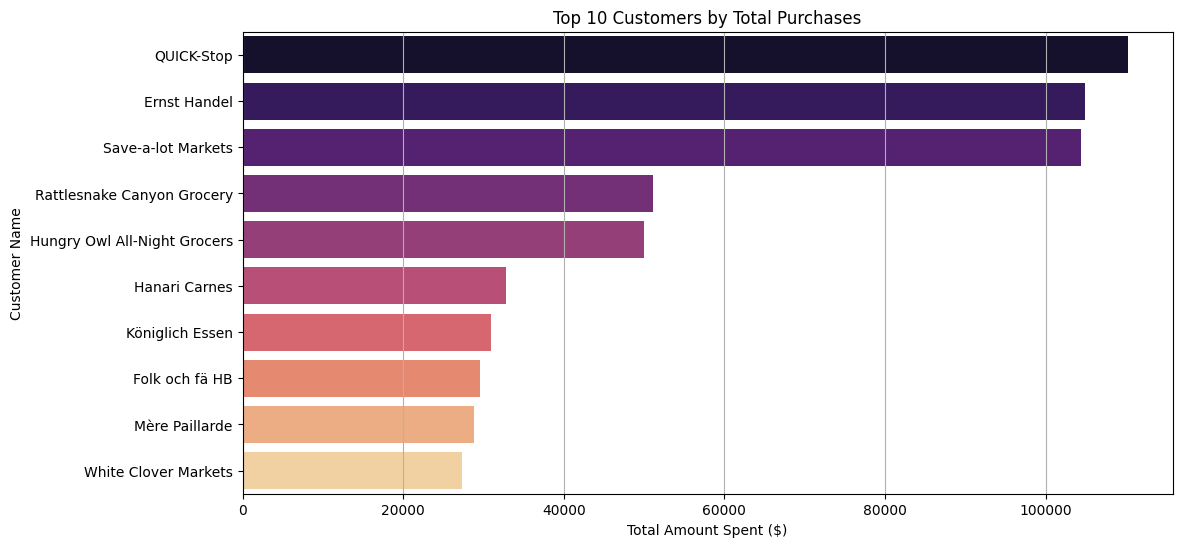

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_best_customers, x="total_spent", y="companyname", palette="magma")

plt.xlabel("Total Amount Spent ($)")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Total Purchases")
plt.grid(axis="x")
plt.show()

## Sales trends over time

In [20]:
query = """
SELECT 
    DATE_TRUNC('month', o.orderDate) AS month,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_revenue
FROM orders o
JOIN order_details od ON o.orderID = od.orderID
GROUP BY month
ORDER BY month;
"""
df_sales_trends = pd.read_sql(query, engine)
df_sales_trends

,month,total_revenue
0,2013-06-30 22:00:00+00:00,27861.90
1,2013-07-31 22:00:00+00:00,25485.28
2,2013-08-31 22:00:00+00:00,26381.40
3,2013-09-30 22:00:00+00:00,37515.73
4,2013-10-31 22:00:00+00:00,45600.05
5,2013-11-30 22:00:00+00:00,45239.63
6,2013-12-31 22:00:00+00:00,61258.07
7,2014-01-31 22:00:00+00:00,38483.64
8,2014-02-28 22:00:00+00:00,38547.22
9,2014-03-31 22:00:00+00:00,53032.95


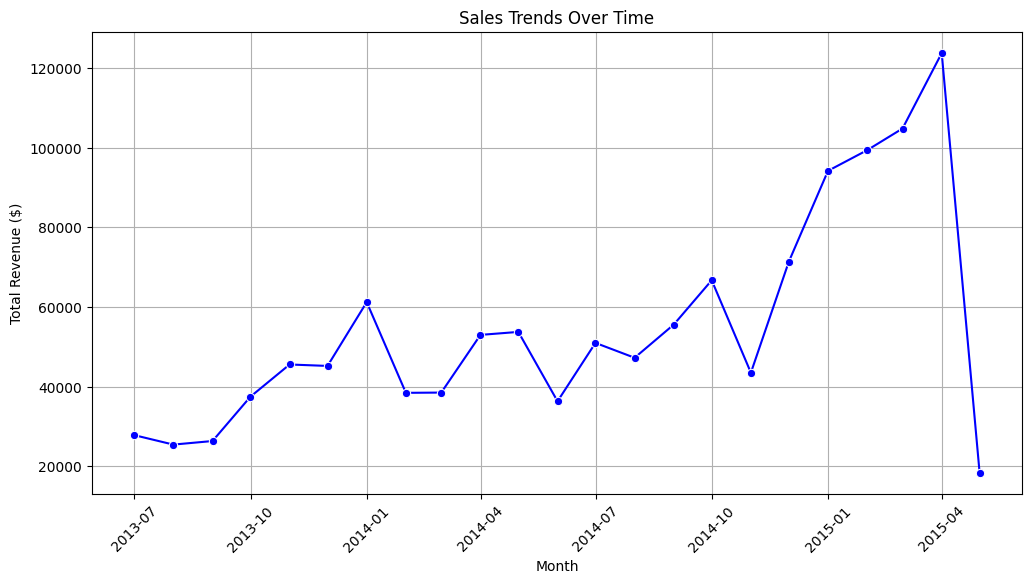

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sales_trends, x="month", y="total_revenue", marker="o", linestyle="-", color="b")

plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Sales Trends Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Order & Shipment Analysis

- Average delivery time
- Orders delayed vs. on time
- Most used shippers
- Average Shipping Cost per Provider

## Average delivery time

In [22]:
query = """
SELECT 
    ROUND(AVG(shippedDate - orderDate), 2) AS avg_delivery_time
FROM orders
WHERE shippedDate IS NOT NULL;
"""
df_avg_delivery = pd.read_sql(query, engine)
df_avg_delivery

,avg_delivery_time
0,8.49


## Orders delayed vs. on time

In [23]:
query = """
SELECT 
    CASE 
        WHEN shippedDate > requiredDate THEN 'Delayed'
        ELSE 'On Time'
    END AS order_status,
    COUNT(*) AS total_orders
FROM orders
WHERE shippedDate IS NOT NULL
GROUP BY order_status;
"""
df_orders_status = pd.read_sql(query, engine)

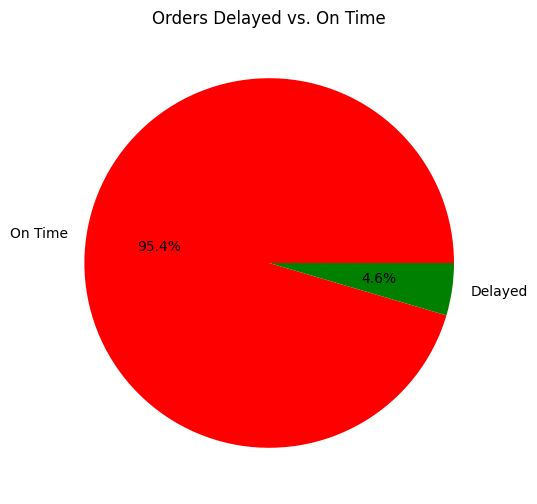

In [24]:
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(df_orders_status["total_orders"], labels=df_orders_status["order_status"], autopct='%1.1f%%', colors=["red", "green"])
plt.title("Orders Delayed vs. On Time")
plt.show()

## Most used shippers

In [25]:
query = """
SELECT 
    s.companyName AS shipper,
    COUNT(o.orderID) AS total_orders
FROM orders o
JOIN shippers s ON o.shipperID = s.shipperID
GROUP BY s.companyName
ORDER BY total_orders DESC;
"""
df_shippers = pd.read_sql(query, engine)

C:\Users\User\AppData\Local\Temp\ipykernel_5800\638690215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_shippers, x="total_orders", y="shipper", palette="coolwarm")


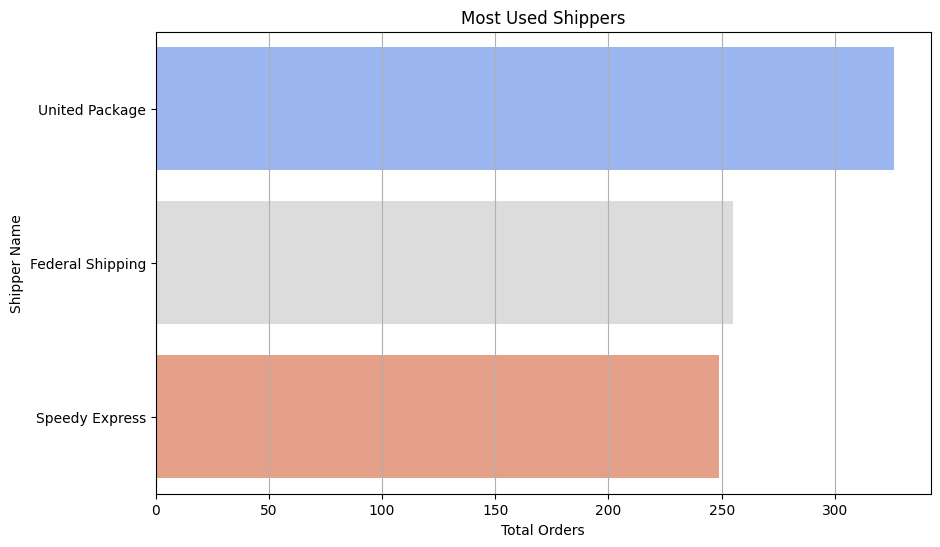

In [26]:
# Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(data=df_shippers, x="total_orders", y="shipper", palette="coolwarm")
plt.xlabel("Total Orders")
plt.ylabel("Shipper Name")
plt.title("Most Used Shippers")
plt.grid(axis="x")
plt.show()

## Average Shipping Cost per Provider

In [43]:
query = """
SELECT 
    s.companyName AS shipper,
    ROUND(AVG(o.freight), 2) AS avg_shipping_cost,
    ROUND(MIN(o.freight), 2) AS min_shipping_cost,
    ROUND(MAX(o.freight), 2) AS max_shipping_cost
FROM orders o
JOIN shippers s ON o.shipperID = s.shipperID
GROUP BY s.companyName
ORDER BY avg_shipping_cost DESC;
"""
df_shipping_costs = pd.read_sql(query, engine)
df_shipping_costs

,shipper,avg_shipping_cost,min_shipping_cost,max_shipping_cost
0,United Package,86.64,0.02,890.78
1,Federal Shipping,80.44,0.40,1007.64
2,Speedy Express,65.00,0.12,458.78


C:\Users\User\AppData\Local\Temp\ipykernel_5800\2033271022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_shipping_costs, x="avg_shipping_cost", y="shipper", palette="coolwarm")


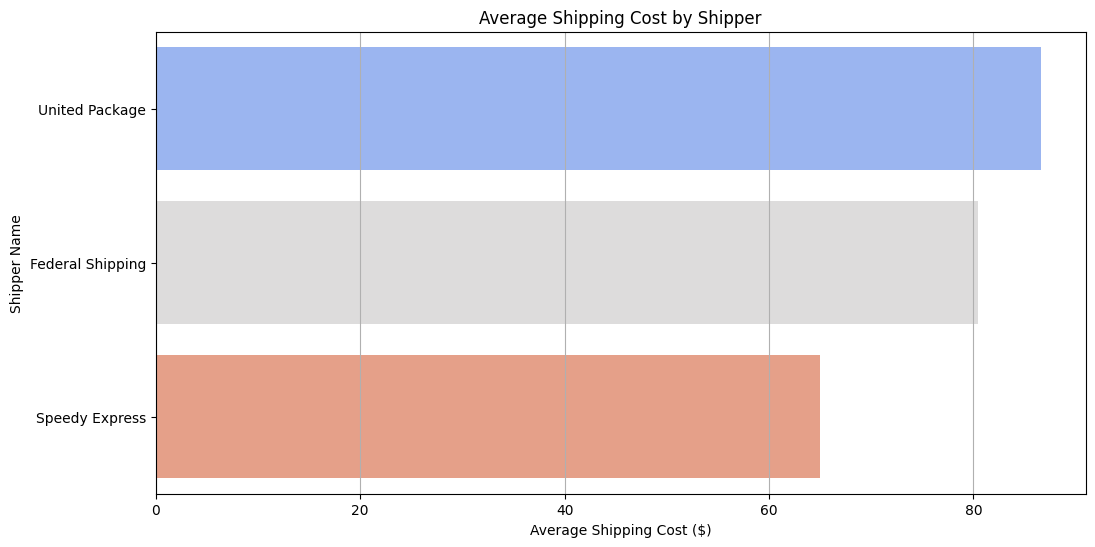

In [44]:
# Bar Chart for Average Shipping Cost
plt.figure(figsize=(12,6))
sns.barplot(data=df_shipping_costs, x="avg_shipping_cost", y="shipper", palette="coolwarm")
plt.xlabel("Average Shipping Cost ($)")
plt.ylabel("Shipper Name")
plt.title("Average Shipping Cost by Shipper")
plt.grid(axis="x")
plt.show()

## Shipping Cost Variability Across Providers

In [45]:
query = """
SELECT 
    s.companyName AS shipper,
    o.freight AS shipping_cost
FROM orders o
JOIN shippers s ON o.shipperID = s.shipperID;
"""
df_shipping_variability = pd.read_sql(query, engine)
df_shipping_variability

,shipper,shipping_cost
0,Federal Shipping,32.38
1,Speedy Express,11.61
2,United Package,65.83
3,Speedy Express,41.34
4,United Package,51.30
...,...,...
825,United Package,24.95
826,United Package,18.44
827,United Package,6.19
828,United Package,38.28


C:\Users\User\AppData\Local\Temp\ipykernel_5800\2191754036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_shipping_variability, x="shipper", y="shipping_cost", palette="Set2")


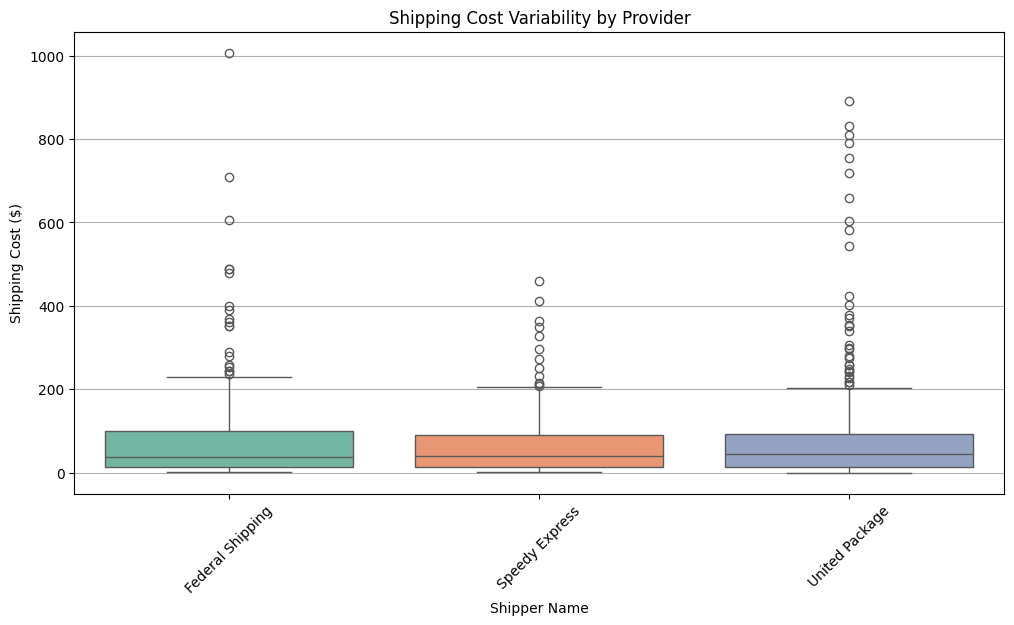

In [46]:
# Box Plot for Shipping Cost Variation
plt.figure(figsize=(12,6))
sns.boxplot(data=df_shipping_variability, x="shipper", y="shipping_cost", palette="Set2")
plt.xlabel("Shipper Name")
plt.ylabel("Shipping Cost ($)")
plt.title("Shipping Cost Variability by Provider")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Employee Performance

- Sales per employee
- Number of orders handled by each employee

## Sales per employee

In [53]:
query = """
SELECT 
    e.employeeID,
    e.employeeName AS employee_name, e.title,
    ROUND(SUM(od.unitPrice * od.quantity * (1 - od.discount)), 2) AS total_sales
FROM orders o
JOIN employees e ON o.employeeID = e.employeeID
JOIN order_details od ON o.orderID = od.orderID
GROUP BY e.employeeID, employee_name
ORDER BY total_sales DESC;
"""
df_employee_sales = pd.read_sql(query, engine)
df_employee_sales

,employeeid,employee_name,title,total_sales
0,4,Margaret Peacock,Sales Representative,232890.85
1,3,Janet Leverling,Sales Representative,202812.84
2,1,Nancy Davolio,Sales Representative,192107.60
3,2,Andrew Fuller,Vice President Sales,166537.76
4,8,Laura Callahan,Sales Manager,126862.28
5,7,Robert King,Sales Representative,124568.24
6,9,Anne Dodsworth,Sales Representative,77308.07
7,6,Michael Suyama,Sales Representative,73913.13
8,5,Steven Buchanan,Sales Manager,68792.28


C:\Users\User\AppData\Local\Temp\ipykernel_5800\3424067291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_employee_sales, x="total_sales", y="employee_name", palette="Blues_r")


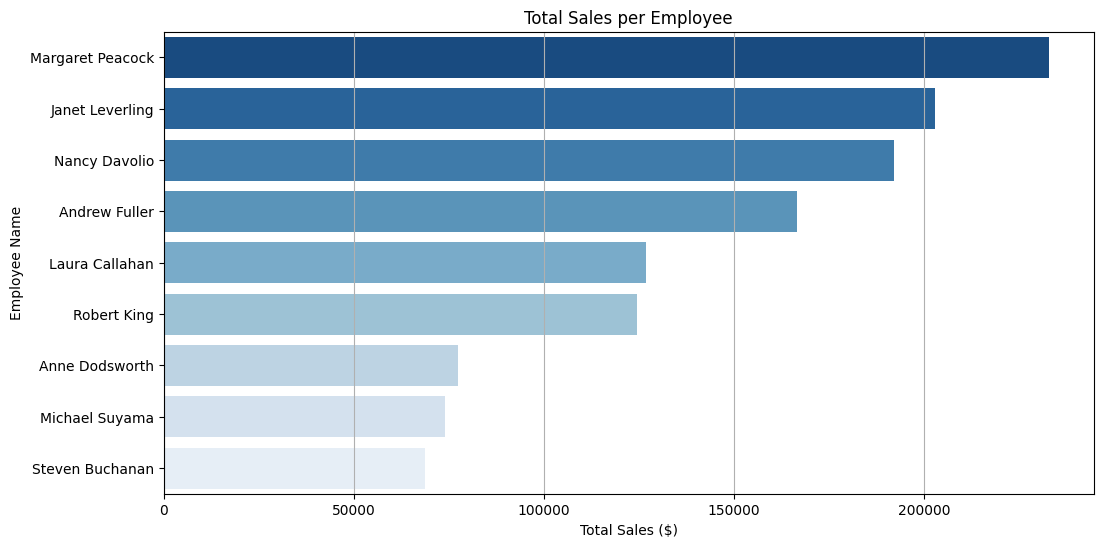

In [30]:
# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_employee_sales, x="total_sales", y="employee_name", palette="Blues_r")
plt.xlabel("Total Sales ($)")
plt.ylabel("Employee Name")
plt.title("Total Sales per Employee")
plt.grid(axis="x")
plt.show()

## Number of orders handled by each employee

In [31]:
query = """
SELECT 
    e.employeeID,
    e.employeeName AS employee_name,
    COUNT(o.orderID) AS total_orders_handled
FROM orders o
JOIN employees e ON o.employeeID = e.employeeID
GROUP BY e.employeeID, employee_name
ORDER BY total_orders_handled DESC;
"""
df_orders_per_employee = pd.read_sql(query, engine)
df_orders_per_employee

,employeeid,employee_name,total_orders_handled
0,4,Margaret Peacock,156
1,3,Janet Leverling,127
2,1,Nancy Davolio,123
3,8,Laura Callahan,104
4,2,Andrew Fuller,96
5,7,Robert King,72
6,6,Michael Suyama,67
7,9,Anne Dodsworth,43
8,5,Steven Buchanan,42


C:\Users\User\AppData\Local\Temp\ipykernel_5800\3045454405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_orders_per_employee, x="total_orders_handled", y="employee_name", palette="coolwarm")


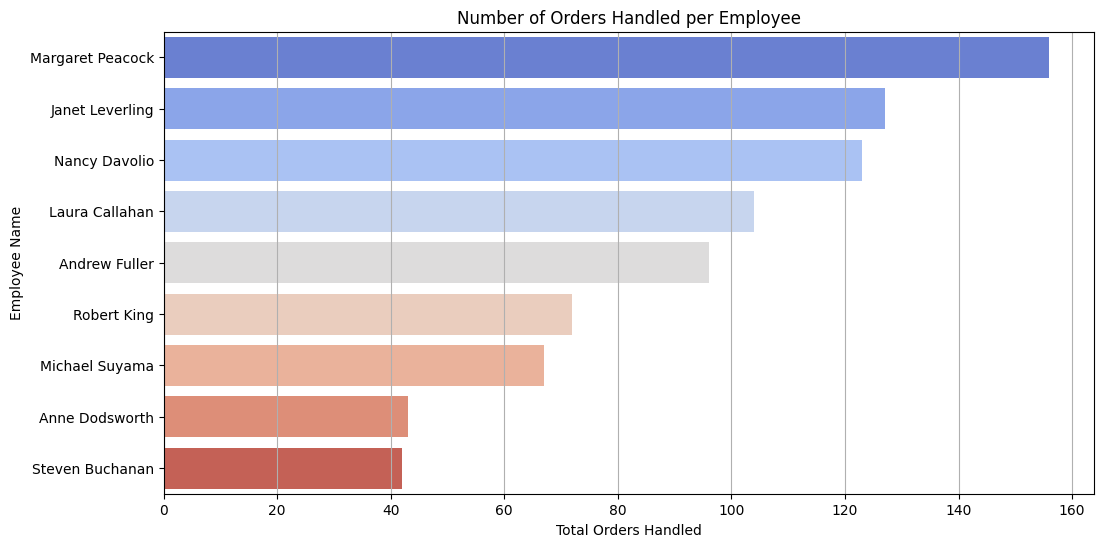

In [32]:
# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_orders_per_employee, x="total_orders_handled", y="employee_name", palette="coolwarm")
plt.xlabel("Total Orders Handled")
plt.ylabel("Employee Name")
plt.title("Number of Orders Handled per Employee")
plt.grid(axis="x")
plt.show()

# Customer Insights

- Most frequent customers
- Customer distribution by country/city

## Most frequent customers

In [33]:
query = """
SELECT 
    c.customerID,
    c.companyName,
    COUNT(o.orderID) AS total_orders
FROM orders o
JOIN customers c ON o.customerID = c.customerID
GROUP BY c.customerID, c.companyName
ORDER BY total_orders DESC
LIMIT 10;
"""
df_frequent_customers = pd.read_sql(query, engine)
df_frequent_customers

,customerid,companyname,total_orders
0,SAVEA,Save-a-lot Markets,31
1,ERNSH,Ernst Handel,30
2,QUICK,QUICK-Stop,28
3,FOLKO,Folk och fä HB,19
4,HUNGO,Hungry Owl All-Night Grocers,19
5,RATTC,Rattlesnake Canyon Grocery,18
6,BERGS,Berglunds snabbköp,18
7,HILAA,HILARION-Abastos,18
8,BONAP,Bon app',17
9,FRANK,Frankenversand,15


C:\Users\User\AppData\Local\Temp\ipykernel_5800\3662035147.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_frequent_customers, x="total_orders", y="companyname", palette="coolwarm")


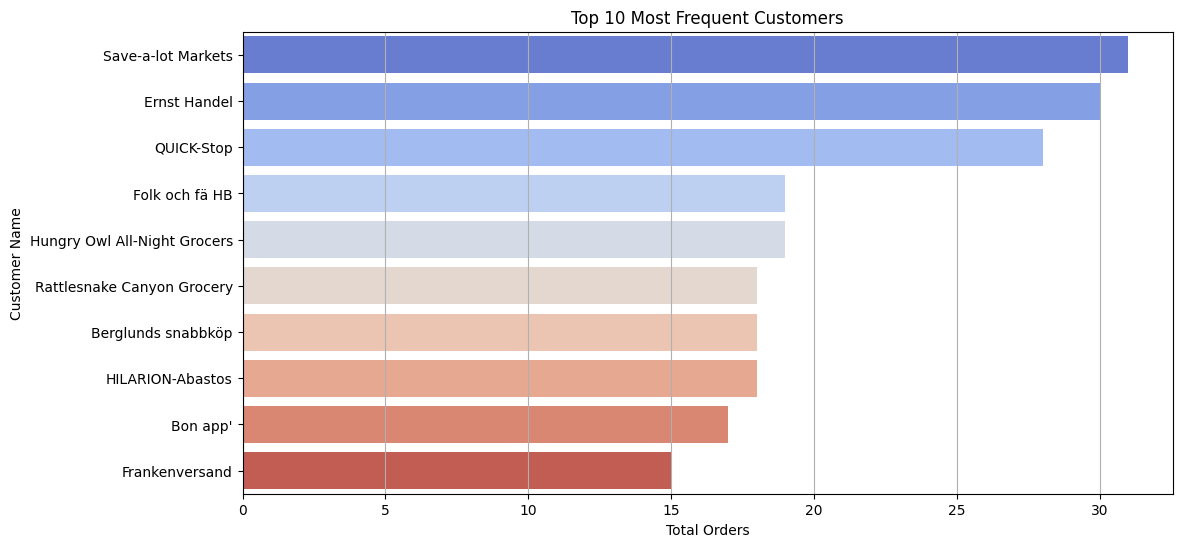

In [35]:
# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_frequent_customers, x="total_orders", y="companyname", palette="coolwarm")
plt.xlabel("Total Orders")
plt.ylabel("Customer Name")
plt.title("Top 10 Most Frequent Customers")
plt.grid(axis="x")
plt.show()

## Customer distribution by country/city

In [36]:
query = """
SELECT 
    country,
    COUNT(customerID) AS total_customers
FROM customers
GROUP BY country
ORDER BY total_customers DESC;
"""
df_customers_country = pd.read_sql(query, engine)
df_customers_country

,country,total_customers
0,USA,13
1,Germany,11
2,France,11
3,Brazil,9
4,UK,7
5,Mexico,5
6,Spain,5
7,Venezuela,4
8,Argentina,3
9,Italy,3


C:\Users\User\AppData\Local\Temp\ipykernel_5800\1153597121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_customers_country, x="total_customers", y="country", palette="viridis")


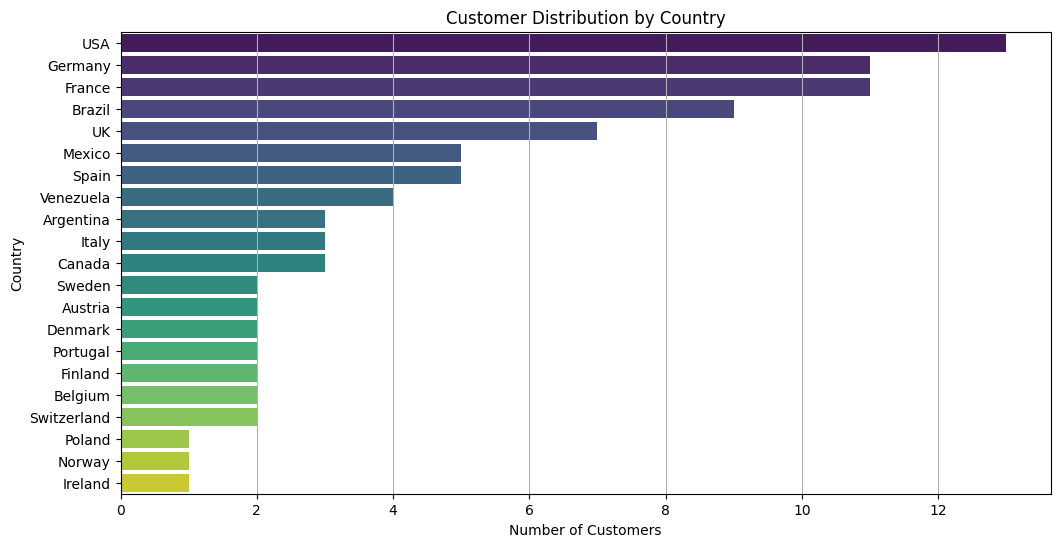

In [37]:
# Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(data=df_customers_country, x="total_customers", y="country", palette="viridis")
plt.xlabel("Number of Customers")
plt.ylabel("Country")
plt.title("Customer Distribution by Country")
plt.grid(axis="x")
plt.show()

# Observation